<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#By-Gender" data-toc-modified-id="By-Gender-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>By Gender</a></span></li><li><span><a href="#By-Gender-and-By-Field" data-toc-modified-id="By-Gender-and-By-Field-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>By Gender and By Field</a></span></li><li><span><a href="#By-High-D-vs-High-C" data-toc-modified-id="By-High-D-vs-High-C-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>By High D vs High C</a></span></li><li><span><a href="#By-High-D-vs-High-C-and-By-Field" data-toc-modified-id="By-High-D-vs-High-C-and-By-Field-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>By High D vs High C and By Field</a></span></li></ul></div>

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib as plt

### Data

In [4]:
# Import data
data = pd.read_csv('20200211_surprisal.csv')

/home/ekaterina/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data.head()

,patent_id,application_year,grant_year,field_nber_category_id,field_nber_subcategory_id,field_wos_research_area,inventors_total,inventors_gender_final_male,inventors_gender_final_female,inventors_gender_final_unknown,...,abs_adverbslen_mean_sp_tok,cd_5,mcd_5,i_5,cd_10,mcd_10,i_10,cd_2017y,mcd_2017y,i_2017y
0,5164715,1990,1992,2.0,23.0,Technology,5.0,2,1,0,...,6.333333,0.375000,1.125000,3.0,0.350000,2.450000,7.0,0.778409,106.642000,137
1,5177974,1988,1993,6.0,69.0,Other,4.0,4,0,0,...,9.000000,0.111111,0.222222,2.0,0.066667,0.400000,6.0,0.058824,0.529412,9
2,5379515,1994,1995,5.0,52.0,Technology,10.0,9,0,0,...,7.600000,0.006024,0.018072,3.0,0.021978,0.263736,12.0,0.020330,0.447268,22
3,5264790,1991,1993,4.0,43.0,Technology,2.0,2,0,0,...,7.125000,0.555556,2.777780,5.0,0.366667,4.033330,11.0,0.397436,12.320500,31
4,5300544,1993,1994,1.0,15.0,Physical Sciences,3.0,3,0,0,...,9.500000,0.000000,0.000000,0.0,-0.012346,-0.049383,4.0,-0.019231,-0.134615,7


In [6]:
# Map column names
column_names = ['patent_id',
'application_year',
'grant_year',
'field_nber_category_id',
'field_nber_subcategory_id',
'field_wos_research_area',
'inventors_total',
'inventors_gender_final_male',
'inventors_gender_final_female',
'inventors_gender_final_unknown',
'uspc_csubclasses_new',
'uspc_csubclasses_total',
'uspc_csubclass_pairs_new',
'uspc_csubclass_pairs_total',
'cited_total',
'cited_self',
'cited_self_risk',
'cited_age_mean',
'cited_age_sd',
'jsdis_tok_0',
'jsdis_pos_0',
'codis_tok_0',
'codis_pos_0',
'jsdis_tok_5',
'jsdis_pos_5',
'codis_tok_5',
'codis_pos_5',
'sents_len_mean',
'sents_len_std',
'num_sents',
'num_clause_subjs',
'num_clause_comps',
'num_open_clause_comps',
'num_adv_clause',
'num_adj_clause',
'num_lists',
'num_parataxis',
'num_tokens',
'num_unique_tokens',
'num_nouns',
'num_adjs',
'num_verbs',
'num_adverbs',
'tokens_len_mean',
'nouns_len_mean',
'adjs_len_mean',
'verbs_len_mean',
'adverbs_len_mean',
'cd_5',
'mcd_5',
'i_5',
'cd_10',
'mcd_10',
'i_10',
'cd_2017y',
'mcd_2017y',
'i_2017y']

data.columns = column_names

In [7]:
data['field_nber_category_id'].unique()

array([ 2.,  6.,  5.,  4.,  1.,  3., nan,  7.])

In [8]:
# id	title
# 1	Chemical
# 2	Cmp&Cmm
# 3	Drgs&Med
# 4	Elec
# 5	Mech
# 6	Others

In [9]:
# Subset by data above 0.5 and below 0.5 according to the cd_5 index
data_above = data[data['cd_5'] > 0.5]
data_below = data[data['cd_5'] < -0.5]

In [10]:
len(data_above)

398842

In [11]:
len(data_below)

14278

In [12]:
data_above = data_above.head(14278)

In [14]:
data_below_groupby = data_below.groupby('field_nber_category_id')['jsdis_tok_5', 'jsdis_pos_5'].mean()
data_above_groupby = data_above.groupby('field_nber_category_id')['jsdis_tok_5', 'jsdis_pos_5'].mean()

In [15]:
data_above_groupby = data_above_groupby.rename(columns={'jsdis_tok_5':'above_tokens',
                                                       'jsdis_pos_5':'above_pos'})
data_below_groupby = data_below_groupby.rename(columns={'jsdis_tok_5':'below_tokens',
                                                       'jsdis_pos_5':'below_pos'})

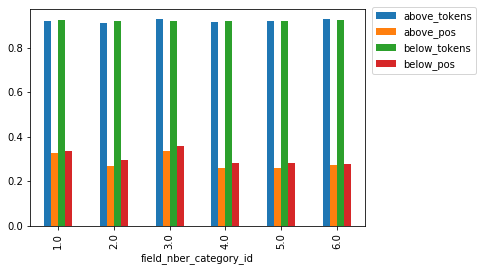

In [84]:
pd.concat([data_above_groupby,data_below_groupby],axis=1).plot.bar().legend(loc=(1.02,0.7))

### By Gender

In [17]:
data_all_male = data[(data['inventors_gender_final_male'] > 0) & (data['inventors_gender_final_female'] == 0)]

In [18]:
data_all_female = data[(data['inventors_gender_final_male'] == 0) & (data['inventors_gender_final_female'] > 0)]

In [19]:
data_diverse = data[(data['inventors_gender_final_male'] > 0) & (data['inventors_gender_final_female'] > 0)]

In [20]:
len(data_all_male)

4713451

In [21]:
len(data_all_female)

178182

In [22]:
len(data_diverse)

751378

In [23]:
data_all_male = data_all_male.head(178182)
data_diverse = data_diverse.head(178182)

In [24]:
def plot1(feature):
    df = pd.DataFrame()
    df['male' + ' ' + feature] = [data_all_male[feature].mean()]
    df['female' + ' ' + feature] = [data_all_female[feature].mean()]
    df['diverse' + ' ' + feature] = [data_diverse[feature].mean()]
    df.index.names = [feature]
    plot = df.plot.bar()
    return plot.legend(loc=(1.02,0.84))

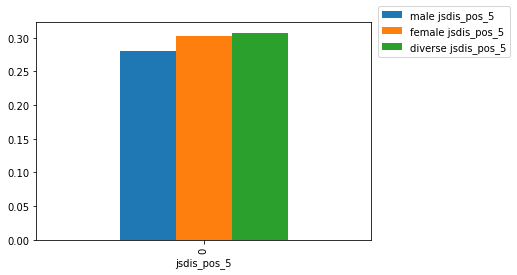

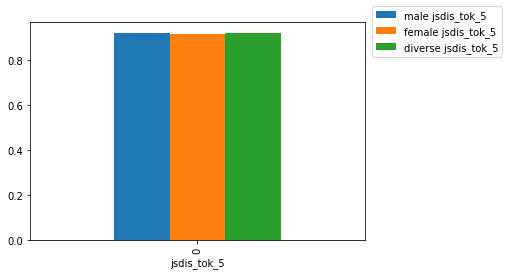

In [25]:
plot1('jsdis_pos_5')
plot1('jsdis_tok_5')

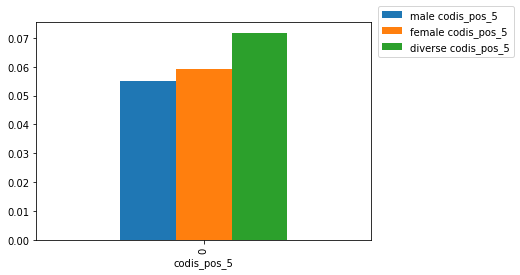

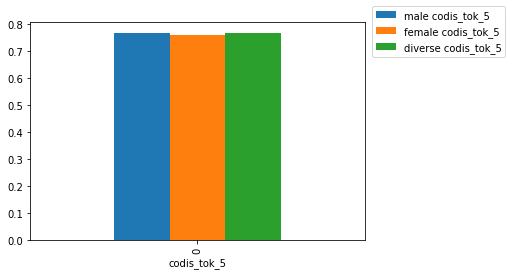

In [26]:
plot1('codis_pos_5')
plot1('codis_tok_5')

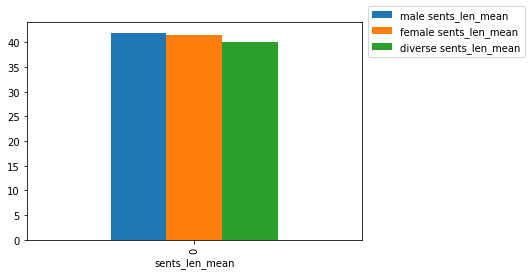

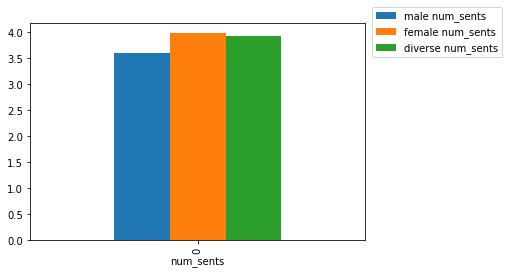

In [27]:
plot1('sents_len_mean')
plot1('num_sents')

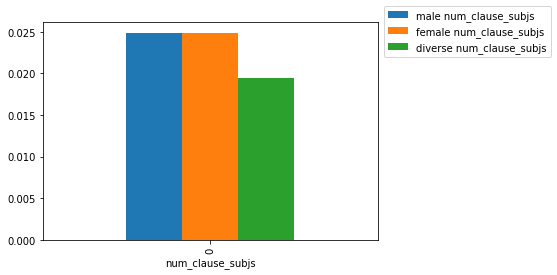

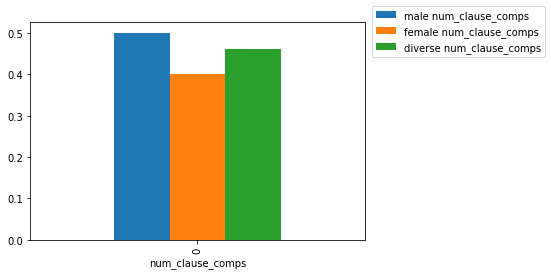

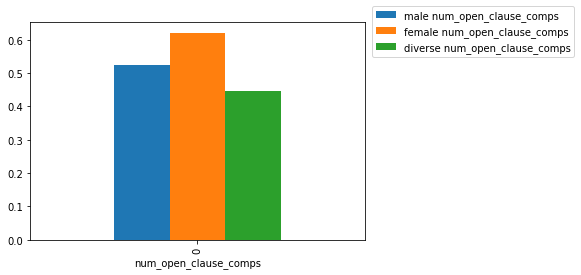

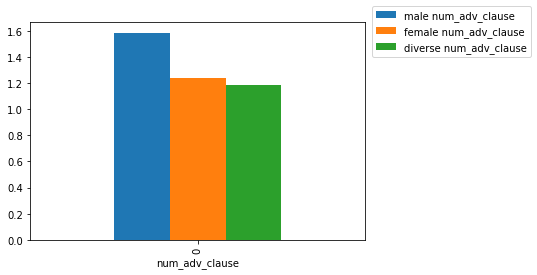

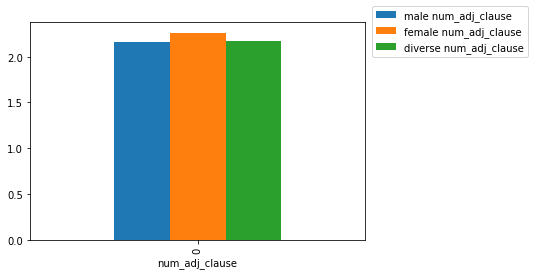

In [28]:
plot1('num_clause_subjs')
plot1('num_clause_comps')
plot1('num_open_clause_comps')
plot1('num_adv_clause')
plot1('num_adj_clause')

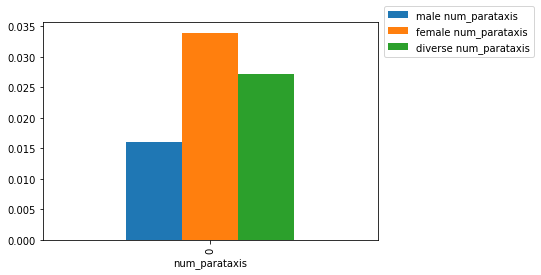

In [29]:
plot1('num_parataxis')

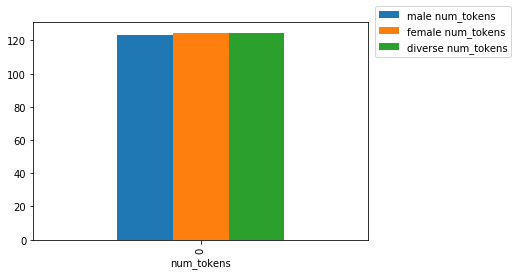

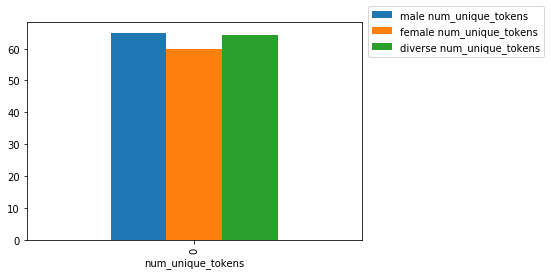

In [30]:
plot1('num_tokens')
plot1('num_unique_tokens')

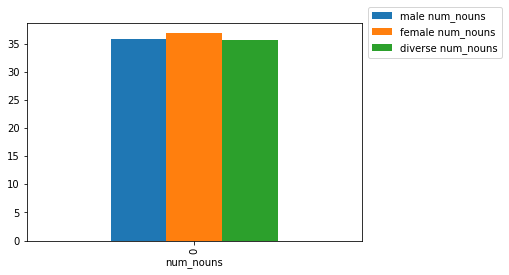

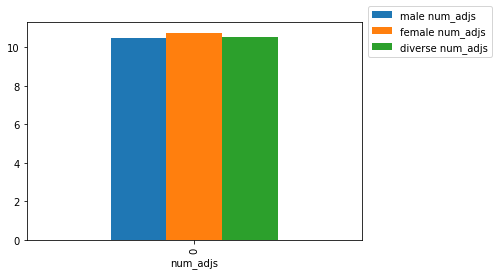

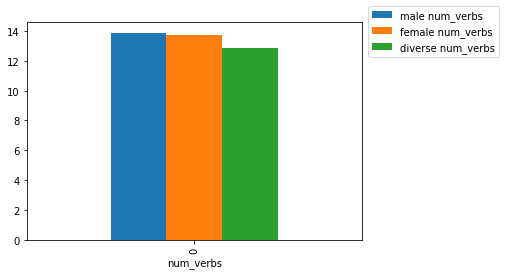

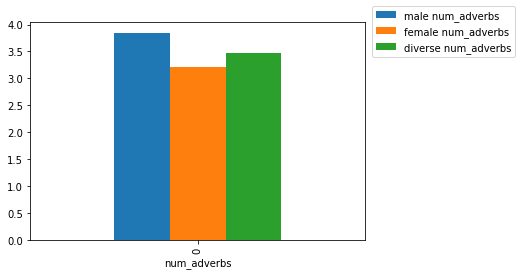

In [31]:
plot1('num_nouns')
plot1('num_adjs')
plot1('num_verbs')
plot1('num_adverbs')

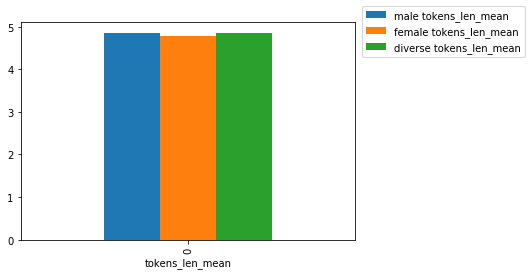

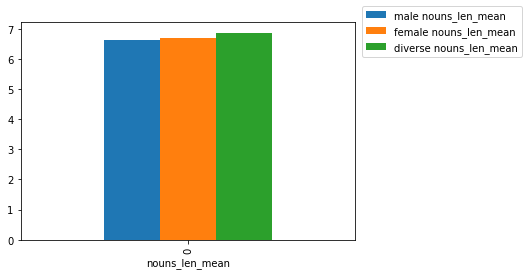

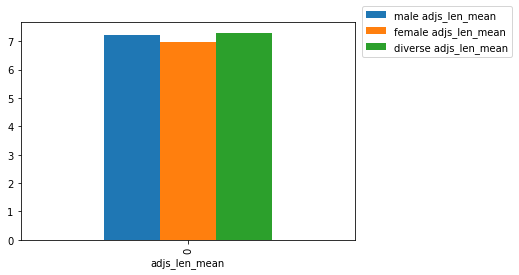

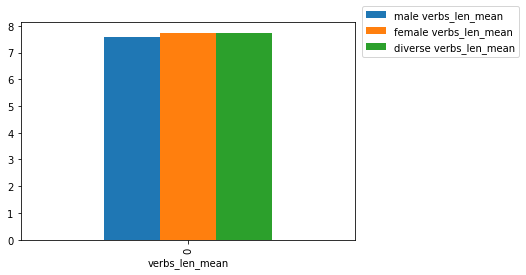

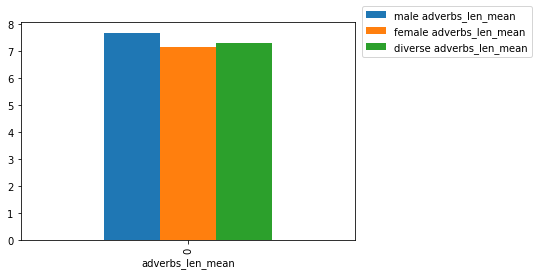

In [32]:
plot1('tokens_len_mean')
plot1('nouns_len_mean') 
plot1('adjs_len_mean')
plot1('verbs_len_mean')
plot1('adverbs_len_mean')

### By Gender and By Field

In [33]:
def plot12(feature):
    data_all_male_groupby = data_all_male.groupby('field_nber_category_id')[feature].mean()
    data_all_female_groupby = data_all_female.groupby('field_nber_category_id')[feature].mean()
    data_diverse_groupby = data_diverse.groupby('field_nber_category_id')[feature].mean()
    data_all_male_groupby = data_all_male_groupby.rename(columns={feature:'male ' + feature})
    data_all_female_groupby = data_all_female_groupby.rename(columns={feature:'female ' + feature})
    data_diverse_groupby = data_diverse_groupby.rename(columns={feature:'diverse ' + feature})
    plot = pd.concat([data_all_male_groupby,data_all_female_groupby,data_diverse_groupby],axis=1).rename(columns={0:'male ' + feature, 1:'female ' + feature, 2:'diverse ' + feature}).plot.bar()
    return plot.legend(loc=(1.02,0.84))

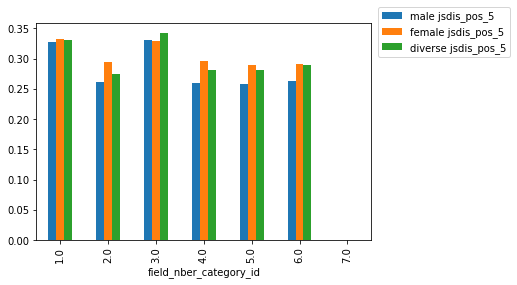

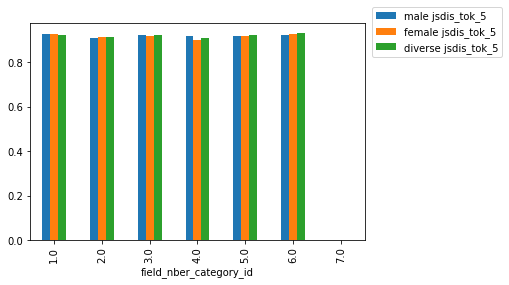

In [34]:
plot12('jsdis_pos_5')
plot12('jsdis_tok_5')

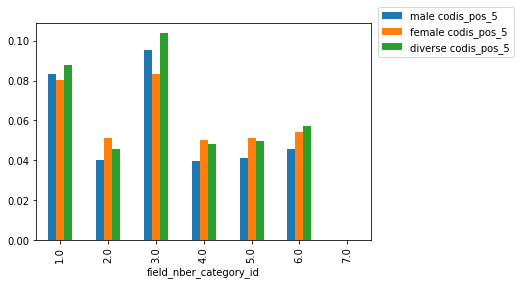

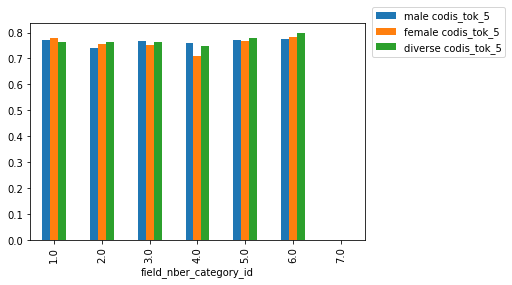

In [35]:
plot12('codis_pos_5')
plot12('codis_tok_5')

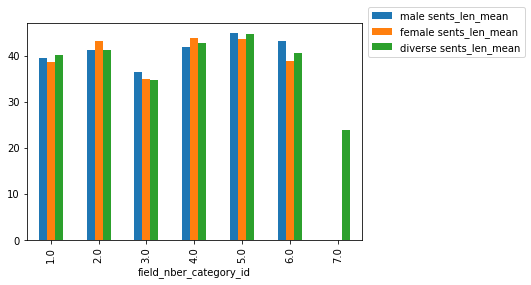

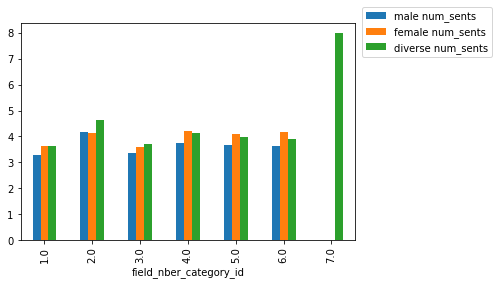

In [36]:
plot12('sents_len_mean')
plot12('num_sents')

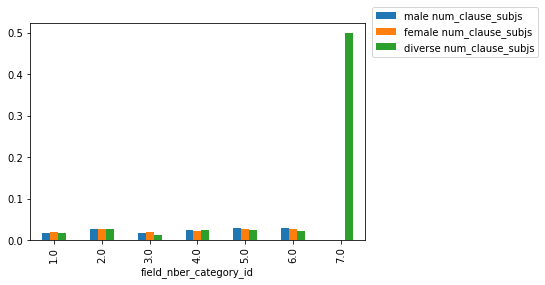

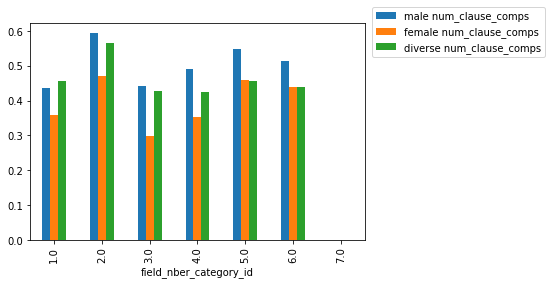

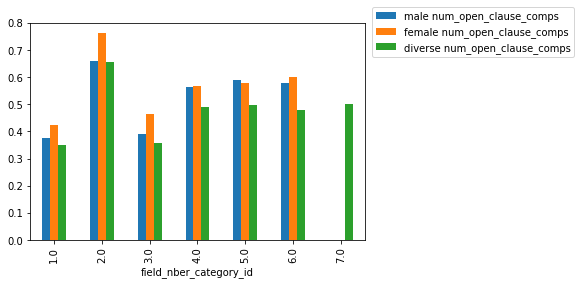

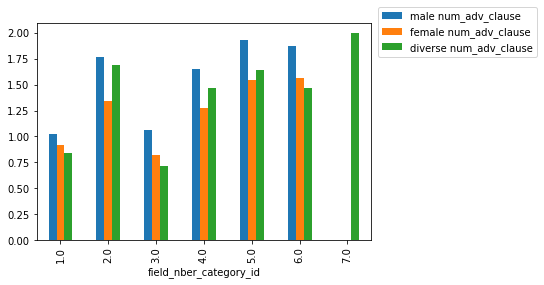

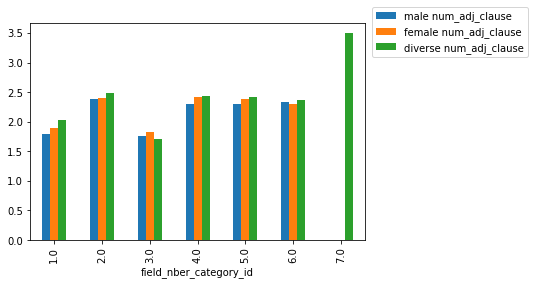

In [37]:
plot12('num_clause_subjs')
plot12('num_clause_comps')
plot12('num_open_clause_comps')
plot12('num_adv_clause')
plot12('num_adj_clause')

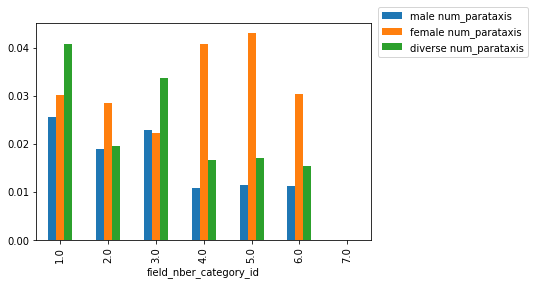

In [38]:
plot12('num_parataxis')

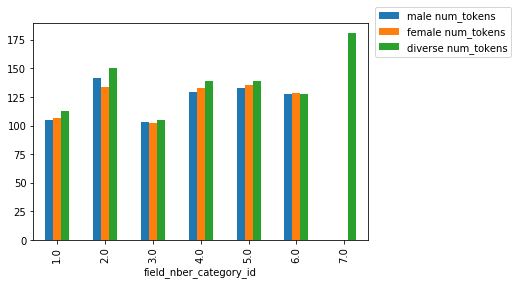

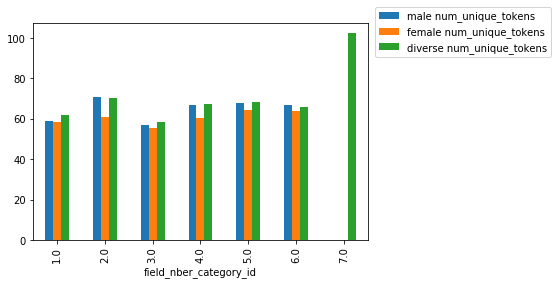

In [39]:
plot12('num_tokens')
plot12('num_unique_tokens')

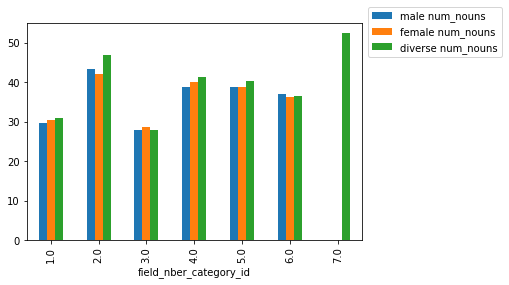

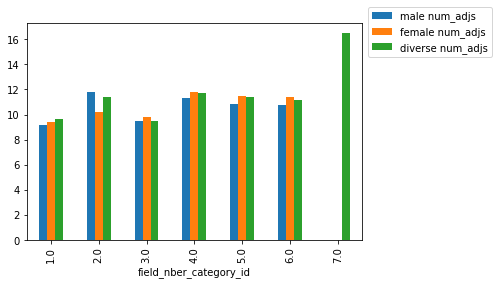

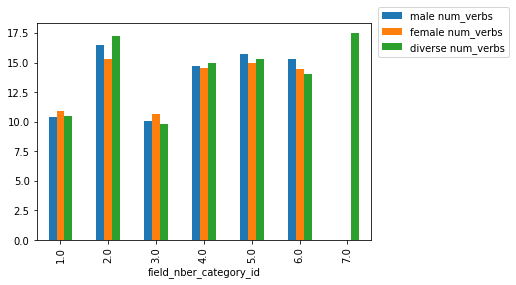

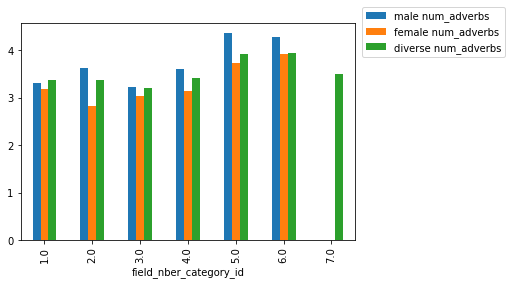

In [40]:
plot12('num_nouns')
plot12('num_adjs')
plot12('num_verbs')
plot12('num_adverbs')

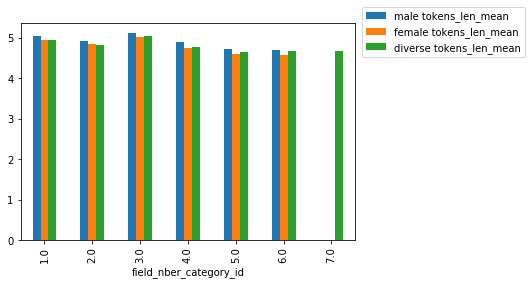

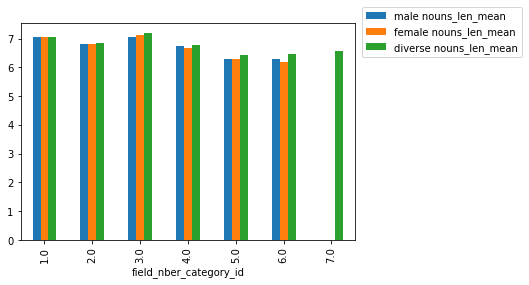

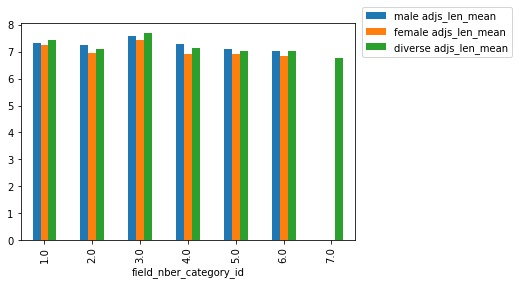

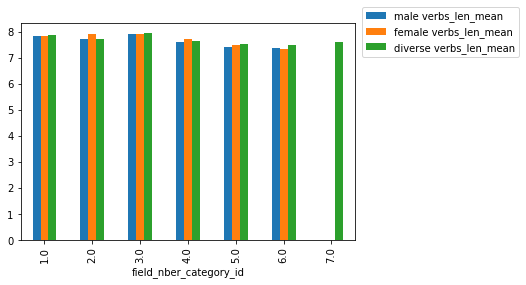

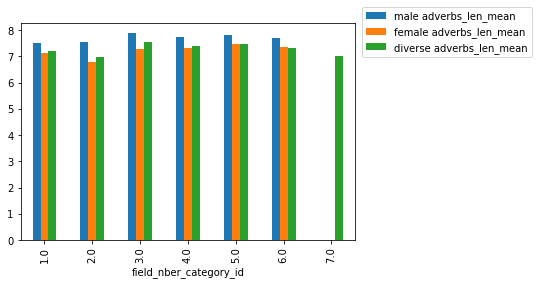

In [41]:
plot12('tokens_len_mean')
plot12('nouns_len_mean') 
plot12('adjs_len_mean')
plot12('verbs_len_mean')
plot12('adverbs_len_mean')

### By High D vs High C

In [42]:
def plot2(feature):
    df = pd.DataFrame()
    df['above' + ' ' + feature] = [data_above[feature].mean()]
    df['below' + ' ' + feature] = [data_below[feature].mean()]
    df.index.names = [feature]
    plot = df.plot.bar()
    return plot.legend(loc=(1.02,0.84))

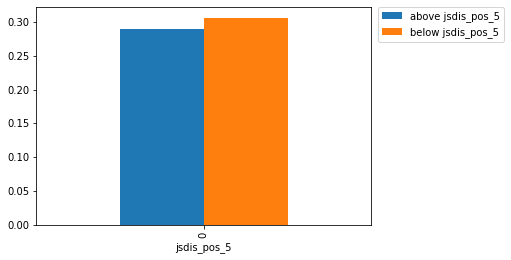

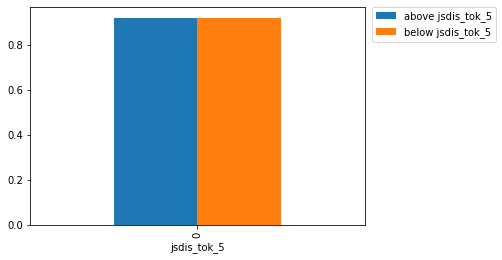

In [43]:
plot2('jsdis_pos_5')
plot2('jsdis_tok_5')

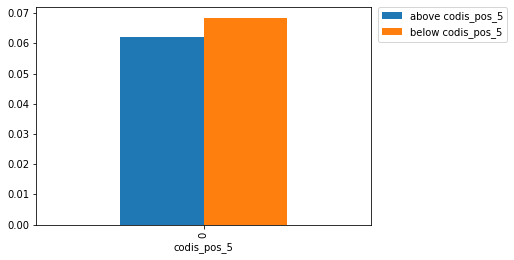

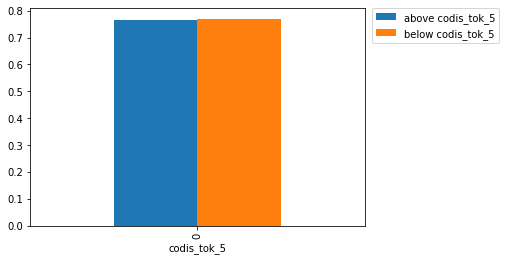

In [44]:
plot2('codis_pos_5')
plot2('codis_tok_5')

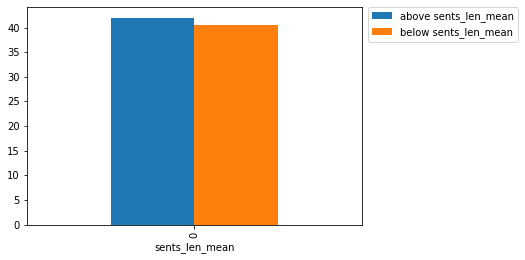

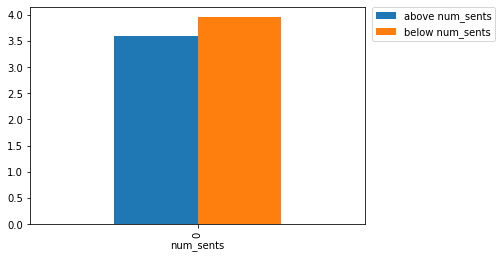

In [45]:
plot2('sents_len_mean')
plot2('num_sents')

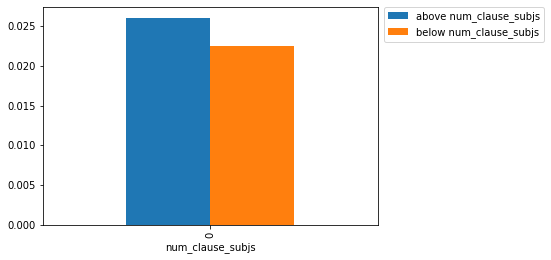

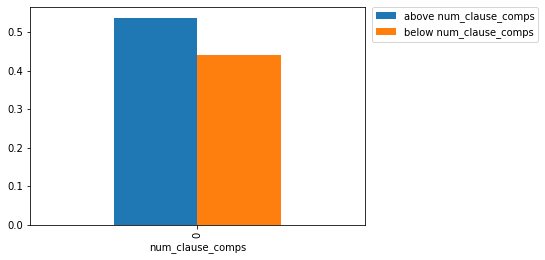

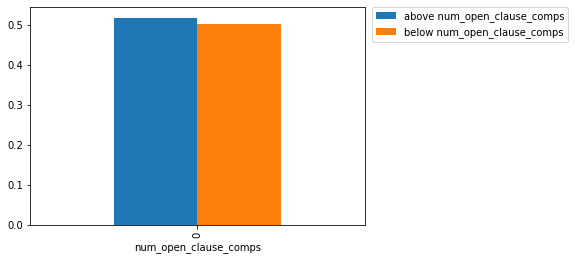

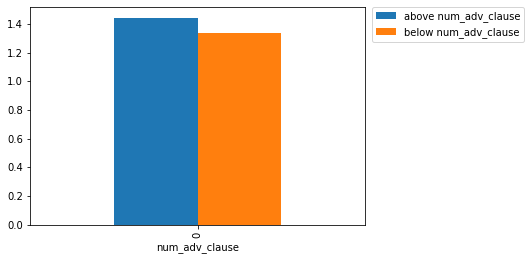

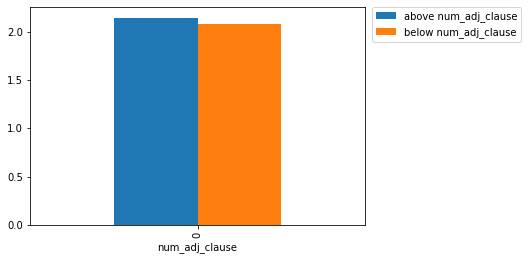

In [46]:
plot2('num_clause_subjs')
plot2('num_clause_comps')
plot2('num_open_clause_comps')
plot2('num_adv_clause')
plot2('num_adj_clause')

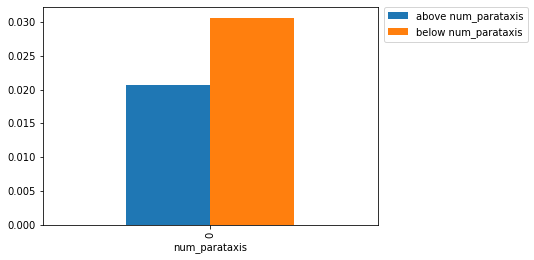

In [47]:
plot2('num_parataxis')

In [ ]:
title_abstracts = pd.read_csv('document_attributes_titles_abstracts.csv', error_bad_lines=False,header=None)

In [96]:
title_abstracts = title_abstracts[title_abstracts[0].str.contains('p')]
title_abstracts[0] = title_abstracts[0].str[1:]
title_abstracts = title_abstracts[[0,4,5,6]]

In [97]:
data_below_subset = data_below[['patent_id']]
data_below_subset['patent_id'] = data_below_subset['patent_id'].astype(str)
merged_below = pd.merge(data_below_subset,title_abstracts,left_on='patent_id',right_on=0)

/home/ekaterina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [98]:
pd.set_option('display.max_colwidth', -1)

In [99]:
merged_below.head(20)

,patent_id,0,4,5,6
0,4062896,4062896,Nitro-diphenyl ethers,"Nitrodiphenyl ether derivatives of the general formula: ##STR1## wherein X stands for Cl, F, CH.sub.3 or CF.sub.3, n is an integer of 1-3 with the proviso that X may be the same or different when n is 2 or 3 but X.sub.n should not be 2,4-dichloro substituent, Are valuable as herbicides possessing an excellent herbicidal activity to a wide variety of undesirable weeds with an extremely low toxicity to useful crops. These nitrodiphenyl ether derivatives are prepared by hydroxyethylation of a compound of the above general formula except that a halogen atom is present in place of nitro group and subsequent halogenation of the .beta.-hydroxyethoxy group of the resulting compound.",Chemical
1,4039440,4039440,Reverse osmosis membrane,"A reverse osmosis membrane is prepared by reaction of a film or layer of polyethylenimine with a polyfunctional reagent whose functional groups are capable of reacting with amine groups. The polyfunctional reagent is preferably a water-soluble, aromatic or heterocyclic compound having acid chloride or isocyanate functional groups. The membrane is preferably prepared in situ on a polysulfone or chlorinated polyvinyl chloride support by initial formation of a layer of polyethylenimine on the support, followed by interfacial reaction with the polyfunctional reagent to produce a thin surface coating possessing salt barrier characteristics.",Chemical
2,4011383,4011383,Tetra(neophyl) zirconium and its use in process for the polymerization of olefins,"There are disclosed olefin polymerization catalysts based on tetra(neophyl) zirconium and its reaction products with surface-hydroxylated oxides of metals of Groups II(a), III(a), IV(a) and IV(b) of the Periodic Table of the Elements, processes for their preparation, and processes for the polymerization of olefinic monomers employing such catalysts. Neophyl zirconium aluminate supported on alumina is disclosed as the preferred, most active catalyst. The polyolefins produced are linear high polymers of high crystallinity such as polyethylene and isotactic polypropylene. Diolefins are converted into rubber by use of the process employing the catalyst. Ethylene-propylene copolymer rubbers can also be produced by use of the catalysts.",Chemical
3,3998435,3998435,Oscillating stirrers,"An oscillatory stirring apparatus for liquids in a container comprising a stirring assembly attachable to said container and means to supply at least two cyclically alternating flows of air under positive and negative pressures to said stirring assembly, said stirring assembly comprising a housing containing at least two pressure-activated chambers spacedly arranged within said housing, a stirring rod dependingly supported within said housing, means interconnecting a portion of said rod within said housing with each of said chambers, means on the exterior of said housing to connect said chambers to said air flow supply means and means to secure said housing to said container in sealing relationship with an opening in said container.",Chemical
4,4033131,4033131,Two stage servomotor,"In a servomotor having a two stage output created by the transfer of an operational force from a first diameter piston to a concentric second diameter piston, a control valve is concentrically located within the second diameter piston to provide for a uniform transition from the first diameter piston to the second diameter piston.",Elec
5,4018040,4018040,Stop-motion for automatic doffing apparatus,"The apparatus includes a plurality of bobbin transporting members for transporting bobbins from supply sources to belt-like conveyors extending along opposite sides of a spinning machine with which the apparatus is associated. During normal operation of the apparatus, oscillatorily-movable drive means imparts continuous, synchronous oscillatory movement to the bobbin transporting members. The stop-motion promptly halts operation of the apparatus in response

In [100]:
data_above_subset = data_above[['patent_id']]
data_above_subset['patent_id'] = data_above_subset['patent_id'].astype(str)
merged_above = pd.merge(data_above_subset,title_abstracts,left_on='patent_id',right_on=0)

/home/ekaterina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [101]:
merged_above.head(20)

,patent_id,0,4,5,6
0,5264790,5264790,Device for detecting relative speed of inner and outer rings for an ABS braking system,"A device for detecting speed in a braking system between two relatively rotatable elements, such as, the inner and outer rings of a roller bearing used to support a vehicle wheel. The device includes a first deflector mounted on one of the bearing rings having a magnetized ring member and a plurality of radially outwardly facing poles separated by non-magnetized spaces and a serrated annular member having a plurality of radially inwardly facing ribs. The device further includes a second deflector integral with a fixed ring of the bearing having at least one magnetic sensor engageable between the two bearing rings and spaced to intersect the magnetic fields to produced a plurality of signals per revolution. The signal produced by the sensor has a frequency proportional to the relative speed of the inner and outer bearing rings.",Elec
1,3985958,3985958,Secret telephony,"1. In secret telephony, means to analyze speech message waves into slowly varying currents representative of energy variations in respective portions of the speech frequency band, distributor means for rapidly switching fragments of said currents to line in rotation, a source of masing currents for each of said slowly varying currents, the masking currents each varying in magnitude in random manner, and synchronously operating means for adding masking current from a respective source to each fragment of the switched currents.",Cmp&Cmm
2,3983326,3983326,Key pulse generator for secrecy signalling circuit,"6. In a pulse generating system, means for producing irregular pulses in each of a number of separate circuits, an output for each of said circuits, a pair of holding devices for each of said circuits, means for connecting said holding devices one at a time to their respective circuits and means for combining pulses impressed on each of said outputs from said several circuits with other pulses from a corresponding one of said holding devices.",Cmp&Cmm
3,3933416,3933416,Hermatically sealed motor blower unit with stator inside hollow armature,"13. A hermetically sealed motor blower unit comprising, in combination, a sealed housing having a thrust plate mounted therein and having a re-entrant wall forming a central cavity in said housing, a rotor within said housing, said rotor comprising an impeller, a hollow shaft embracing said cavity and a thrust collar adapted to cooperate with said thrust plate to support the axial thrust of said shaft, one or more journal bearings within said housing for supporting the radial load of said shaft and electric motor means for rotating said rotor, said motor means comprising a motor-stator located within said cavity and adapted to cooperate through a portion of said re-entrant wall with a motor-rotor mounted within said hollow shaft, the portion of said re-entrant wall located between said motor-stator and said motor-rotor being made relatively thin to reduce electrical losses, the bearing surfaces of said thrust plate, thrust collar and journal bearings being in communication with the discharge of said impeller, whereby fluid pumped by said impeller can flow directly to said bearing surfaces to lubricate them.",Mech
4,4673430,4673430,Method for the production of nickel powder,"1. An improved method for producing fine nickel powder having a substantially spherical form and size ranging from about 3 microns to about 7 microns, containing sulphur within a critical range of about 0.02% to about 0.05%, and possessing an improved degree of smoothness and susceptibility for the production of sintered nickel articles of controlled porosity and uniformly good mechanical properties and for uniform sintering at lower sintering temperatures and in shorter sintering periods than when conventional particles of carbonyl decomposed nickel powders are used which comprises vaporizing about one hundred parts per hour of liqui

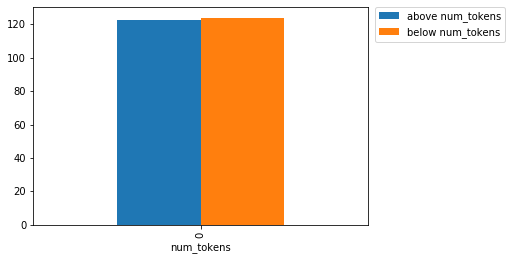

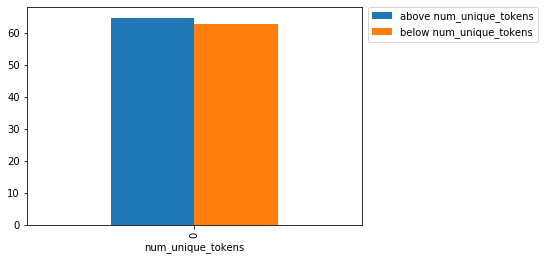

In [54]:
plot2('num_tokens')
plot2('num_unique_tokens')

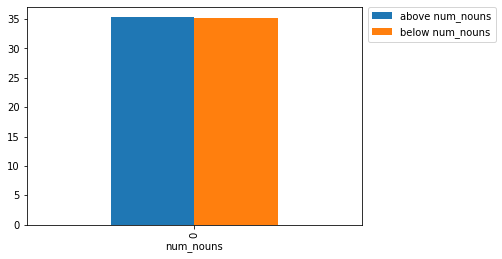

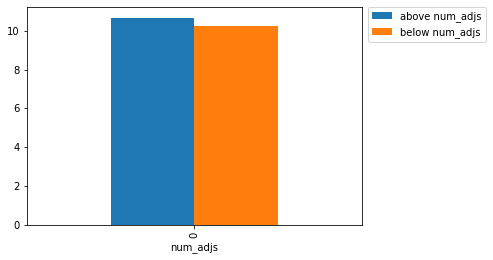

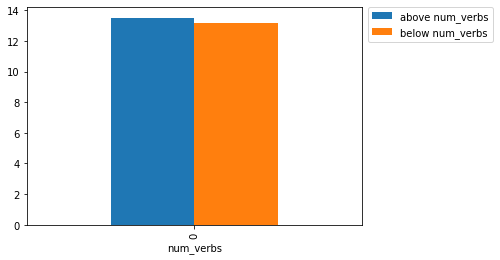

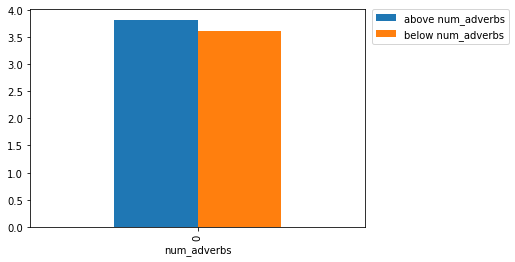

In [55]:
plot2('num_nouns')
plot2('num_adjs')
plot2('num_verbs')
plot2('num_adverbs')

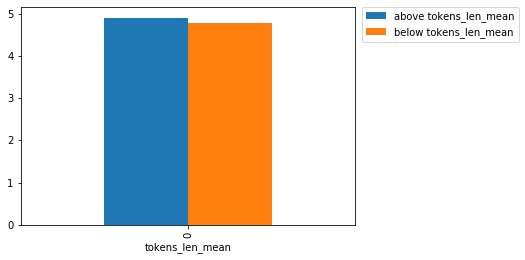

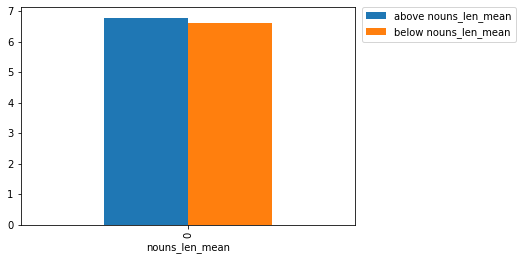

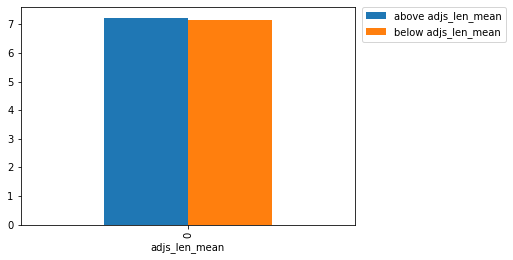

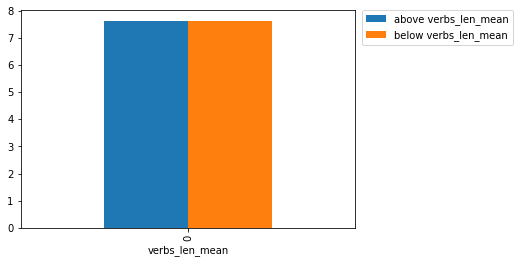

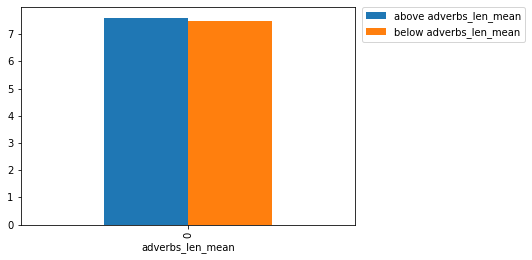

In [56]:
plot2('tokens_len_mean')
plot2('nouns_len_mean') 
plot2('adjs_len_mean')
plot2('verbs_len_mean')
plot2('adverbs_len_mean')

### By High D vs High C and By Field

In [57]:
def plot(feature):
    data_below_groupby = data_below.groupby('field_nber_category_id')[feature].mean()
    data_above_groupby = data_above.groupby('field_nber_category_id')[feature].mean()
    data_above_groupby = data_above_groupby.rename(columns={feature:'above'})
    data_below_groupby = data_below_groupby.rename(columns={feature:'below'})
    
    plot = pd.concat([data_above_groupby,data_below_groupby],axis=1).rename(columns={0:'above' + ' ' + feature,1:'below' + ' ' + feature}).plot.bar()
    return plot.legend(loc=(1.02,0.84))

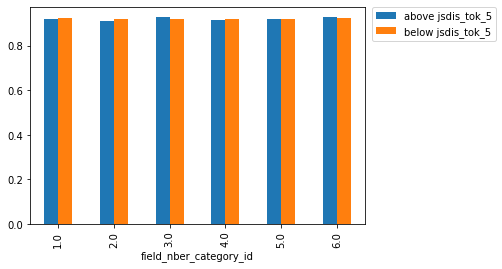

In [58]:
plot('jsdis_tok_5')

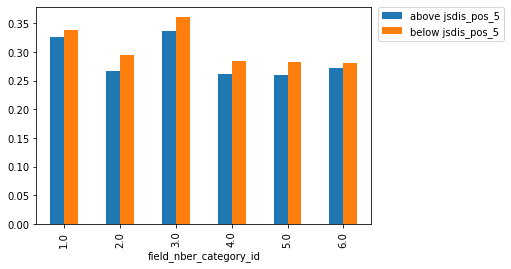

In [59]:
plot('jsdis_pos_5')

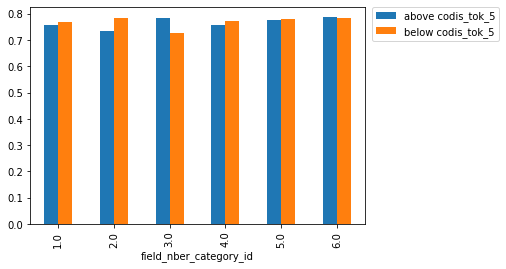

In [60]:
plot('codis_tok_5')

In [ ]:
# Cosine POS

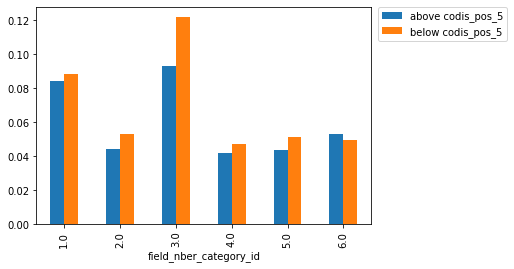

In [61]:
plot('codis_pos_5')

In [62]:
# Almost no difference between ttm5 and ttm0

In [ ]:
# JS POS

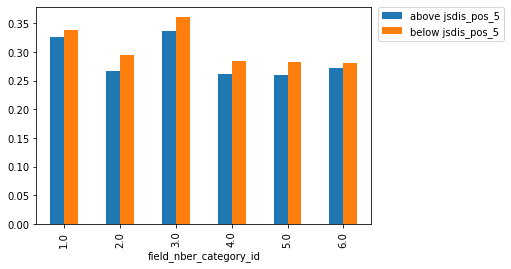

In [63]:
plot('jsdis_pos_5')

In [ ]:
# Average length of sentences

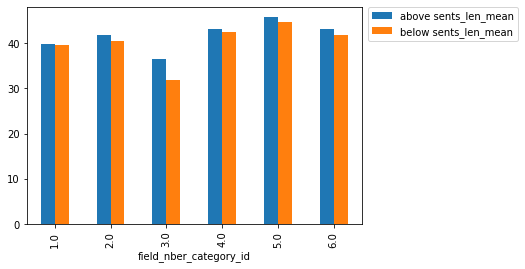

In [64]:
plot('sents_len_mean')

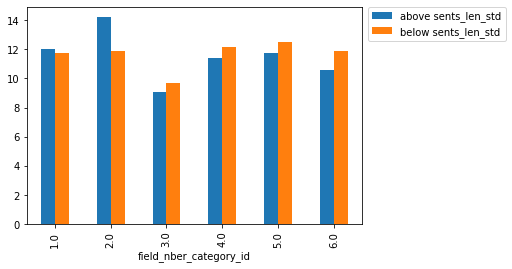

In [65]:
plot('sents_len_std')

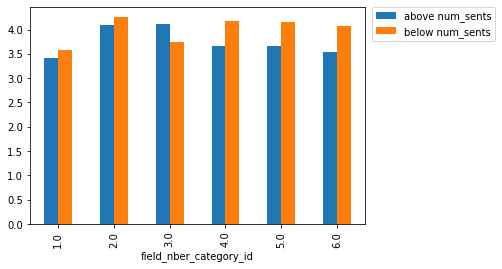

In [66]:
plot('num_sents')

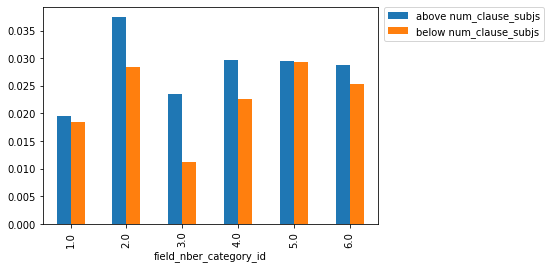

In [67]:
plot('num_clause_subjs')

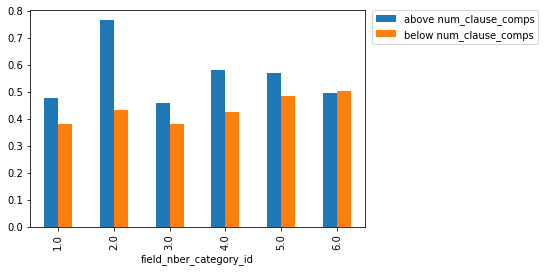

In [68]:
plot('num_clause_comps')

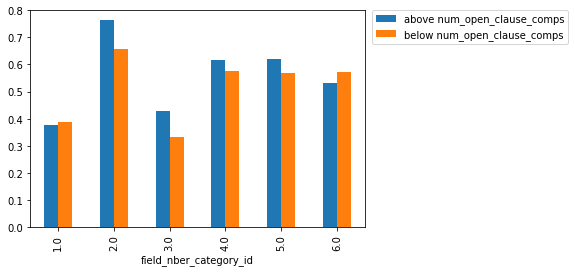

In [69]:
plot('num_open_clause_comps')

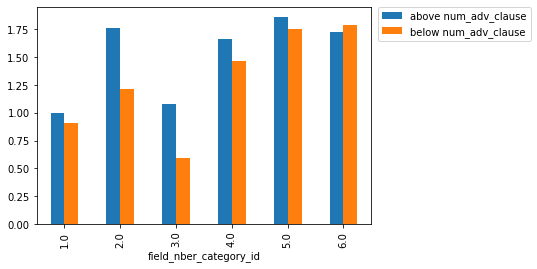

In [70]:
plot('num_adv_clause')

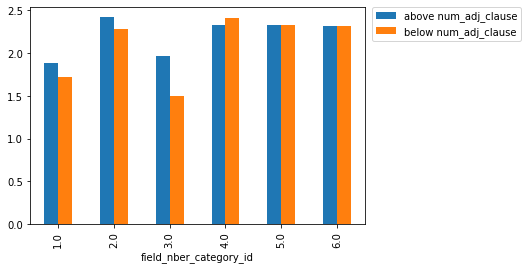

In [71]:
plot('num_adj_clause')

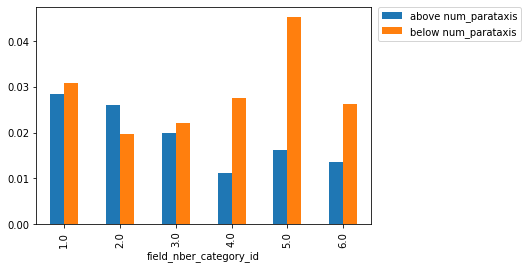

In [72]:
plot('num_parataxis')

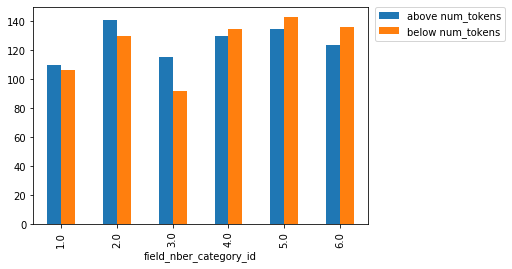

In [73]:
plot('num_tokens')

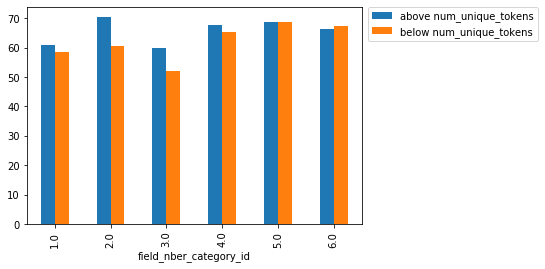

In [74]:
plot('num_unique_tokens')

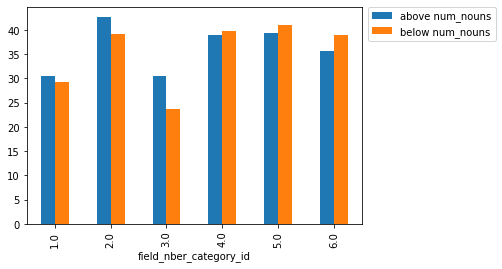

In [75]:
plot('num_nouns')

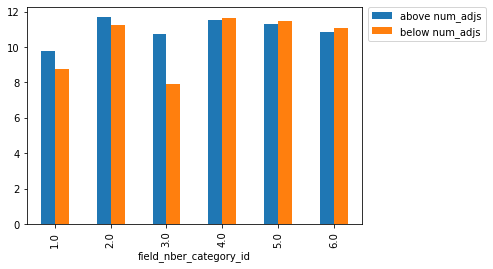

In [76]:
plot('num_adjs')

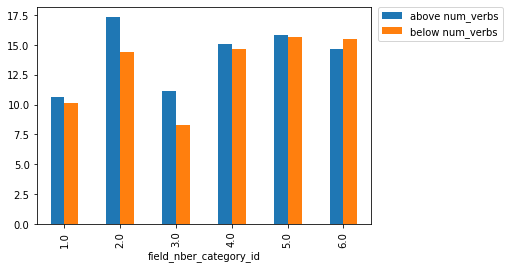

In [77]:
plot('num_verbs')

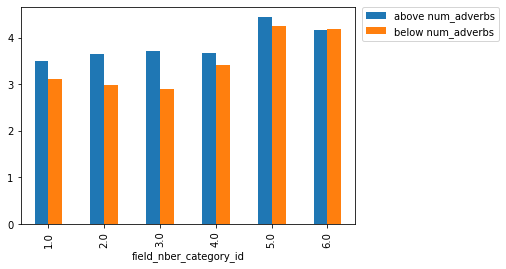

In [78]:
plot('num_adverbs')

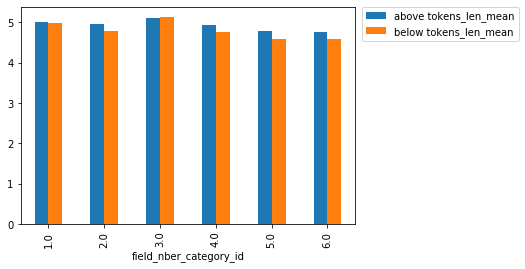

In [79]:
plot('tokens_len_mean')

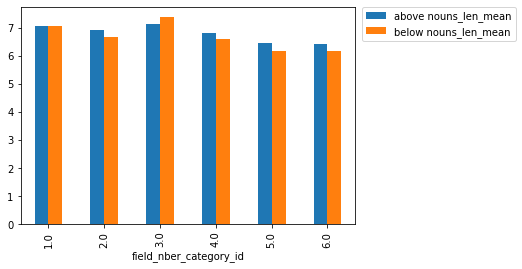

In [80]:
plot('nouns_len_mean')

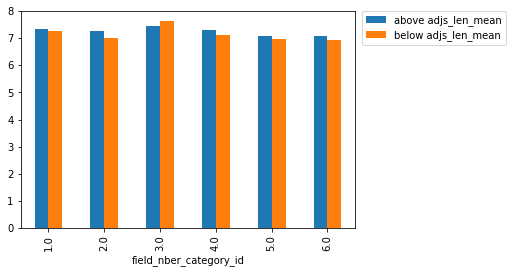

In [81]:
plot('adjs_len_mean')

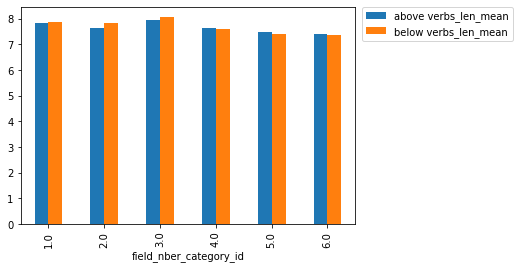

In [82]:
plot('verbs_len_mean')

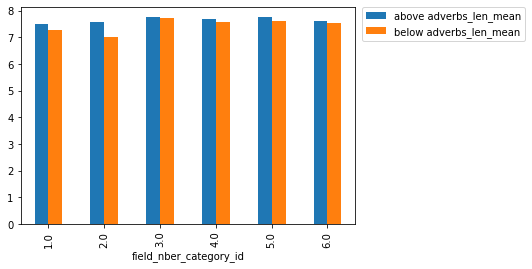

In [83]:
plot('adverbs_len_mean')